IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

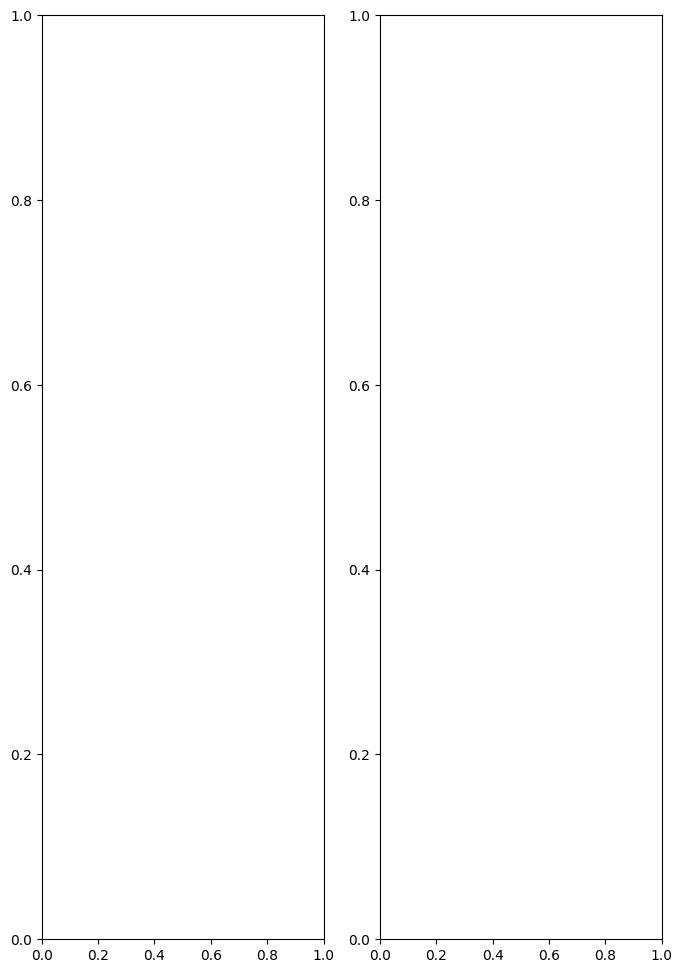

In [2]:
import pandas as pd
import os
import shutil
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = "ISIC2018_Task3_Training_Input"
img_height = 256
img_width = 256

data = pd.read_csv('ISIC2018_Task3_Training_GroundTruth.csv')

# Obtener 3 imágenes al azar del conjunto de imágenes
random_images = random.sample(os.listdir(data_dir), 1)

# Crear una figura con 2 columnas para mostrar las imágenes originales y las imágenes después de data augmentation
fig, axs = plt.subplots(3, 2, figsize=(8, 12))

# Crear el generador de data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    zoom_range=0.2,
    width_shift_range=0,
    height_shift_range=0,
)

# Iterar sobre las imágenes seleccionadas
for i, image_name in enumerate(random_images):
    # Ruta de la imagen original
    original_image_path = os.path.join(data_dir, image_name)
    
    # Cargar y mostrar la imagen original
    original_image = plt.imread(original_image_path)
    axs[i, 0].imshow(original_image)
    axs[i, 0].set_title('Original')
    axs[i, 0].axis('off')
    
    # Preprocesar y aplicar data augmentation a la imagen
    img = tf.keras.preprocessing.image.load_img(original_image_path, target_size=(img_height, img_width))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    augmented_images = datagen.flow(x, batch_size=1)
    
    # Obtener la imagen después de data augmentation y mostrarla
    augmented_image = augmented_images[0][0]
    axs[i, 1].imshow(augmented_image)
    axs[i, 1].set_title('Data Augmentation')
    axs[i, 1].axis('off')
    
# Ajustar los espacios entre las subfiguras y mostrar el gráfico
plt.tight_layout()
plt.show()
